# Cito Toets 

#### Stap 1 Data verzamelen
* We halen de webpagina op waar eea in wordt uitgelegd, en het excel bestand met alle gegevens.
    * <http://www.rtlnieuws.nl/nieuws/binnenland/hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014>
    * <http://www.rtlnieuws.nl/sites/default/files/content/documents/2014/07/07/scholenoverzicht_0.xls>
    
#### Stap 2 Inlezen in pandas, en wat eerste exploratie
* Hier wordt het prima uitgelegd:
    * <http://pbpython.com/pandas-pivot-table-explained.html>

#### Stap 3 Analyse

# Stap 1 Data verzamelen

In [105]:
! wget -nc http://www.rtlnieuws.nl/nieuws/binnenland/hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014

File `hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014' already there; not retrieving.



In [106]:
!wget -nc http://www.rtlnieuws.nl/sites/default/files/content/documents/2014/07/07/scholenoverzicht_0.xls


File `scholenoverzicht_0.xls' already there; not retrieving.



In [107]:
!ls -l


total 13136
-rw-r--r--  1 admin  staff   119698 Feb 16 11:11 CitoToets.ipynb
-rw-r--r--  1 admin  staff    37902 Feb 16 10:10 hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014
-rw-r--r--  1 admin  staff  6560256 Jul  7  2014 scholenoverzicht_0.xls


In [108]:
!chmod a+r CitoToets.ipynb


Zo, we hebben de data binnen. We kunnen met onze analyse beginnen. En met het laatste commando hebben we het notebook ook voro iedereen leesbaar gemaakt.

# Stap 2 Inlezen in pandas, en wat eerste exploratie
* Todo: niet alle kolommen met "cijfers" worden door pandas ook asl cijfers herkend.
* Vaak staat er ook rommel in.
* Bij het inlezen moeten we allicht al flink wat opschonen

In [109]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_excel("scholenoverzicht_0.xls")
df.describe()

,Vestiging,SCHOOLJAAR_2013,SCHOOLJAAR_2012,lageopleiding,middenopleiding,hogeopleiding,inkomen,leefbaar,gew03,gew12,PRED1,quasicito,verwacht
count,7105.000000,7105,7105,6735.000000,6702.000000,6622.000000,6731.000000,6748.000000,6764.000000,6764.000000,6600.000000,7027.000000,7105.000000
mean,0.086137,2013,2012,48.464715,34.224277,17.323787,35077.690144,11.280780,0.066534,0.051543,0.209900,534.275196,534.276638
std,0.376552,0,0,6.537903,3.682526,7.202938,4934.317591,17.530999,0.062869,0.096873,0.542437,3.508336,2.257878
min,0.000000,2013,2012,19.220657,19.451613,4.000000,21377.064220,-49.737495,0.000000,0.000000,-2.598081,513.571697,522.277644
25%,0.000000,2013,2012,44.931270,32.056543,12.625000,31780.388690,5.103337,0.020619,0.000000,0.025088,532.575770,533.439000
50%,0.000000,2013,2012,48.304843,34.713553,15.960061,35189.830510,17.094382,0.049406,0.014634,0.313848,534.347346,534.651553
75%,0.000000,2013,2012,52.338154,36.703577,20.038718,38152.294370,23.006717,0.095637,0.050000,0.523973,536.415278,535.613757
max,5.000000,2013,2012,72.514451,50.396226,54.996970,81267.990070,37.480790,0.550000,0.987805,1.827573,551.527177,541.290255


In [110]:
df.columns

Index([u'BRIN', u'Vestiging', u'id', u'naam', u'adres', u'postcode', u'plaats', u'gemeente', u'provincie', u'denominatie', u'visie', u'bestuur', u'SCHOOLJAAR_2014', u'TOETS_2014', u'N_AFN_2014', u'N_DLN_2014', u'N_DLN_2014_rw', u'SCORE_2014', u'SCORE_2014_rw', u'SCHOOLJAAR_2013', u'TOETS_2013', u'N_AFN_2013', u'N_DLN_2013', u'N_DLN_2013_rw', u'SCORE_2013', u'SCORE_2013_rw', u'SCHOOLJAAR_2012', u'TOETS_2012', u'N_AFN_2012', u'N_DLN_2012', u'SCORE_2012', u'lageopleiding', u'middenopleiding', u'hogeopleiding', u'inkomen', u'leefbaar', u'gew03', u'gew12', u'uitslagtoets2014', u'uitslagtoets2014taal', u'uitslagtoets2014reken', u'uitslagtoets2014tot', u'uitslagtoets2013', u'uitslagtoets2013taal', u'uitslagtoets2013reken', u'uitslagtoets2013tot', u'uitslagtoets2012', u'tellerdeelname', u'noemerdeelname', u'deelnaamper', u'meantoets', u'waretoets', u'RES1', u'PRED1', u'quasicito', u'verwacht', u'cijfer'], dtype='object')

# Stap 3 Analyse
* We laten een eerste voorbeeldje zien.
    * Bekijk de verschillen in gemiddelde cito scores per provincie en per denominatie
    * Hier kijken we alleen naar 2014, naar alleen scholen met cito, en we gebruiken de 'quasicito' kolom.
        * Niet omdat we nou begrijpen wat erin staat, maar alleen omdat pandas er niet over klaagt.
    * We eindigen met een plotje.
        * Het plotje laat niet veel zien.
        * Misschien moeten we iets anders plotten,
            * en het anders tonen $\ldots$
            * afwijking van het gemiddelde allicht

In [111]:
pd.pivot_table(df,index=["provincie"])

,PRED1,SCHOOLJAAR_2012,SCHOOLJAAR_2013,Vestiging,gew03,gew12,hogeopleiding,inkomen,lageopleiding,leefbaar,middenopleiding,quasicito,verwacht
provincie,,,,,,,,,,,,,
Drenthe,0.173186,2012,2013,0.014134,0.078811,0.027966,14.110824,33345.289097,49.941055,14.597960,35.450683,534.079059,534.138314
Flevoland,-0.017217,2012,2013,0.005435,0.066851,0.067303,14.521825,34566.122649,50.270015,-3.155699,35.146249,532.827957,533.365439
Friesland,0.243860,2012,2013,0.006550,0.052426,0.016351,14.408450,32538.355440,49.629341,12.483363,35.704155,534.248504,534.344806
Gelderland,0.262681,2012,2013,0.022654,0.073503,0.039140,16.838905,35396.324905,49.060344,16.205511,34.090811,534.253738,534.541913
Groningen,0.099564,2012,2013,0.013378,0.079412,0.030008,14.503524,31698.477256,49.423106,8.517464,36.215499,534.046825,533.839547
Limburg,0.181122,2012,2013,0.005236,0.066176,0.045503,15.728969,32988.367178,49.177503,14.122077,34.984574,535.554002,534.186548
Noord-Brabant,0.247105,2012,2013,0.009174,0.068267,0.052444,17.136297,36029.509659,48.808959,15.355465,34.068196,534.786504,534.498129
Noord-Holland,0.239917,2012,2013,0.028261,0.054095,0.066671,20.629754,35855.648975,45.393292,7.087340,33.947510,534.241443,534.466323
Overijssel,0.202994,2012,2013,0.012704,0.070622,0.035359,15.153143,34483.864800,49.788173,13.769232,35.116318,534.156298,534.299985


In [3]:
# Beperk alleen tot de cito toets.
df_2014cito= df[df.TOETS_2014 =='cito'  ]


In [113]:
pd.pivot_table(df_2014cito,index=["provincie"], values=['quasicito'])

,quasicito
provincie,
Drenthe,534.181072
Flevoland,532.609053
Friesland,534.200092
Gelderland,534.249122
Groningen,533.992966
Limburg,535.618133
Noord-Brabant,534.787598
Noord-Holland,534.248254
Overijssel,534.277059


### De gemiddelde score en het aantal observaties

In [114]:
pd.pivot_table(df_2014cito,index=["provincie"], values=['quasicito'],aggfunc=[np.mean,len])

,mean,len
,quasicito,quasicito
provincie,,
Drenthe,534.181072,208
Flevoland,532.609053,148
Friesland,534.200092,374
Gelderland,534.249122,850
Groningen,533.992966,280
Limburg,535.618133,363
Noord-Brabant,534.787598,757
Noord-Holland,534.248254,551


In [115]:
pd.pivot_table(df_2014cito,index=["provincie"], values=['quasicito'], columns=['denominatie'], aggfunc=[len]) 

len                                          \
                       quasicito                                           
denominatie   Algemeen Bijzonder Antroposofisch Evang. Broedergemeensch.   
provincie                                                                  
Drenthe                        3            NaN                      NaN   
Flevoland                      4              1                      NaN   
Friesland                      5            NaN                      NaN   
Gelderland                    32              3                      NaN   
Groningen                      4            NaN                      NaN   
Limburg                       13              1                      NaN   
Noord-Brabant                 57            NaN                      NaN   
Noord-Holland                 40            NaN                        1   
Overijssel                     9              1                      NaN   
Utrecht                       19            NaN                      NaN   
Zeeland                        4              1                      NaN   
Zuid-Holland                  36              2                      NaN   

                                                                  \
                                                                   
denominatie   Evangelisch Gereformeerd Vrijgemaakt Hindoeistisch   
provincie                                                          
Drenthe                 1                        6           NaN   
Flevoland             NaN                        1           NaN   
Friesland             NaN                        9           NaN   
Gelderland              2                        7           NaN   
Groningen             NaN                       19           NaN   
Limburg               NaN                      NaN           NaN   
Noord-Brabant           1                        1           NaN   
Noord-Holland           2                        4             1   
Overijssel              1                       11           NaN   
Utrecht                 1                        7             1   
Zeeland               NaN                        3           NaN   
Zuid-Holland            2                       14             3   

                                                             \
                                                              
denominatie   Interconfessioneel Islamitisch Joods Openbaar   
provincie                                                     
Drenthe                        1         NaN   NaN      124   
Flevoland                      1           2   NaN       74   
Friesland                    NaN         NaN   NaN      175   
Gelderland                     1           4   NaN      261   
Groningen                    NaN         NaN   NaN      147   
Limburg                      NaN           2   NaN       47   
Noord-Brabant                  1           8   NaN      144   
Noord-Holland                NaN          12     2      211   
Overijssel                   NaN           1   NaN      142   
Utrecht                      NaN           3   NaN      102   
Zeeland                        1         NaN   NaN       74   
Zuid-Holland                 NaN          12   NaN      322   

                                                                      \
                                                                       
denominatie   Protestants-Christelijk Reformatorisch Rooms-Katholiek   
provincie                                                              
Drenthe                            50              1              22   
Flevoland                          38              2              19   
Friesland                         160              2              23   
Gelderland                        250             38             243   
Groningen                          92              1              17   
Limburg                            10            NaN             2

In [116]:
cito_prov_denominatie_pivot=pd.pivot_table(df_2014cito,index=["provincie"], values=['quasicito'], columns=['denominatie'], aggfunc=[np.mean]).dropna(axis=1)

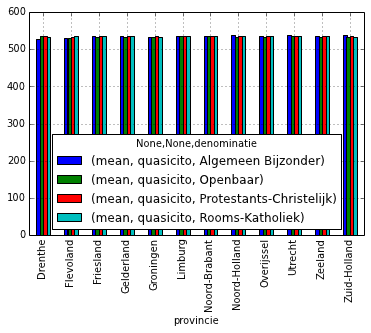

In [117]:
cito_prov_denominatie_pivot.plot(kind='bar')

### Opdrachtje: laat de verschillen in inkomen per provincie zien

In [118]:
prov_ink=pd.pivot_table(df,index=["provincie"])
prov_ink=prov_ink.inkomen.sort('inkomen', inplace=False, ascending=False)
prov_ink.head()

provincie
Utrecht          38786.190502
Noord-Brabant    36029.509659
Noord-Holland    35855.648975
Zuid-Holland     35465.027879
Gelderland       35396.324905
Name: inkomen, dtype: float64

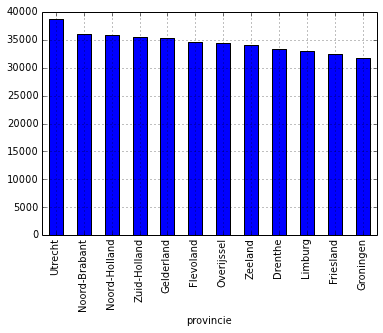

In [119]:
prov_ink.plot(kind='bar' )

### Laat nu de verschillen van het gemiddelde zien 

In [120]:
prov_ink - prov_ink.mean()

provincie
Utrecht          4185.213424
Noord-Brabant    1428.532581
Noord-Holland    1254.671897
Zuid-Holland      864.050801
Gelderland        795.347827
Flevoland         -34.854429
Overijssel       -117.112278
Zeeland          -542.430481
Drenthe         -1255.687981
Limburg         -1612.609900
Friesland       -2062.621638
Groningen       -2902.499822
Name: inkomen, dtype: float64

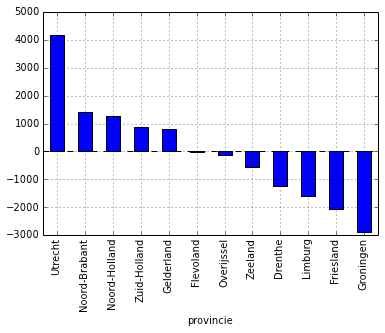

In [121]:
(prov_ink - prov_ink.mean()).plot(kind='bar')

### Jouw beurt: wat zijn de rijkste geloven?

## Correlatie tussen cito score en inkomen

Pearson Correlation (R)


,quasicito,inkomen
quasicito,1.000000,0.473327
inkomen,0.473327,1.000000


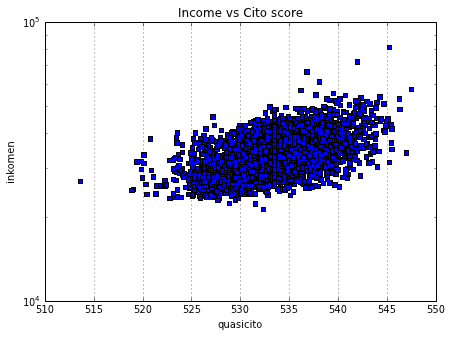

In [9]:
## Correlatie tussen cito score en inkomen

cito_income= df_2014cito[['quasicito','inkomen']]
cito_income.plot(kind='scatter', marker='s', logy=True, figsize=(7, 5), x = 'quasicito', y = 'inkomen', title= 'Income vs Cito score')

# Correlation
print 'Pearson Correlation (R)'
cito_income.corr(method='pearson')